process an image in notebook  

compare fringe fractions with and without added blurred circles on  gauge
images were made by scaling real gauge images.


In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [6]:
image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
test_imgs = [
    {
        "fn_plain": "P1060884_no_circle.bmp",
        "fn_circle": "P1060884_circle.bmp",
        "xygb": np.array([[206.74, 382.94], [1195.4, 466.1], [1153.8, 1431.6]]),
    },
    {
        "fn_plain": "P1060885_no_circle.bmp",
        "fn_circle": "P1060885_circle.bmp",
        "xygb": np.array([[214.37, 468.44], [1506.8, 491.31], [1552.6, 1657.9]]),
    },
]


P1060884_no_circle.bmp 0.24953811364552214
P1060884_circle.bmp 0.25648270547649843
P1060885_no_circle.bmp 0.8144381573442026
P1060885_circle.bmp 0.816524213436309


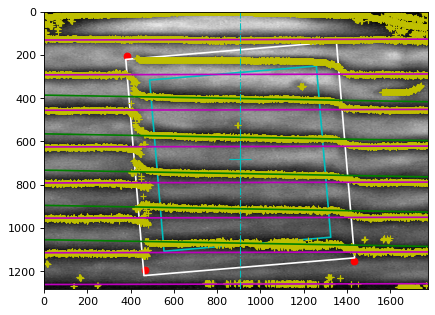

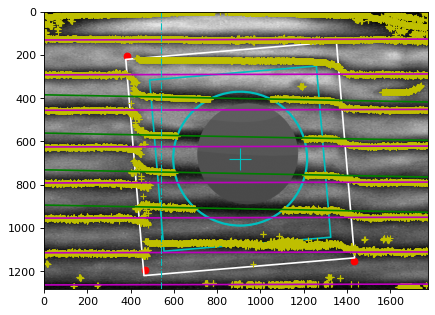

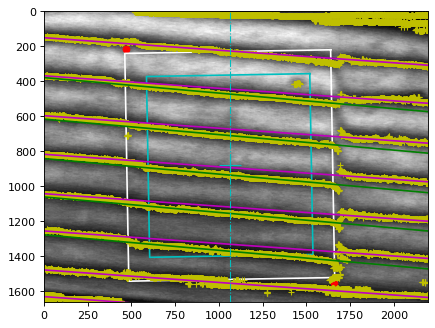

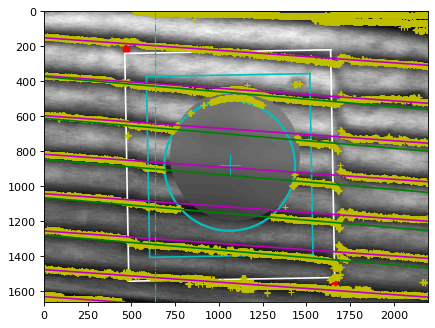

In [12]:
for test in test_imgs:
    # without circle mask
    img_filename = image_folder / test["fn_plain"]
    img = Image.open(img_filename)
    img = img.convert("L")
    img_array = np.asarray(img)
    if img_array.ndim > 2:
        img_array = img_array.mean(axis=2)
    ffrac, drawdata = fp.array2frac(
        img_array, test["xygb"], drawinfo=True, border=(0.1, 0.1)
    )
    print(f"{test['fn_plain']} {ffrac}")
    fig = plt.figure(figsize=(6, 6), dpi=80)
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ph.draw_gauge(axes, img_array, drawdata)

    # with circle mask
    img_filename = image_folder / test["fn_circle"]
    img = Image.open(img_filename)
    img.convert("L")
    img_array = np.asarray(img)
    if img_array.ndim > 2:
        img_array = img_array.mean(axis=2)
    ffrac, drawdata = fp.array2frac(
        img_array, test["xygb"], drawinfo=True, circle_radius=0.32, border=(0.1, 0.1)
    )
    print(f"{test['fn_circle']} {ffrac}")
    fig = plt.figure(figsize=(6, 6), dpi=80)
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ph.draw_gauge(axes, img_array, drawdata)
